<a href="https://colab.research.google.com/github/edabezek/MachineLearning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

veriler = pd.read_csv('musteriler.csv')

X = veriler.iloc[:,3:].values
X[:5] #hacim ve maas

array([[69900,  6325],
       [79000,  5200],
       [85500,  7825],
       [17100,  8375],
       [ 5500,  5450]])

In [ ]:
veriler.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans ( n_clusters = 3, init = 'k-means++')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)
#vereceği ilk satır ilk cluster orta noktaları, sırasıyla hacım ve maas 
#ikinci satır ikinci clusterler için 

[[ 22495.40229885   5307.18390805]
 [ 59182.08955224   5878.35820896]
 [104386.95652174   7289.13043478]]


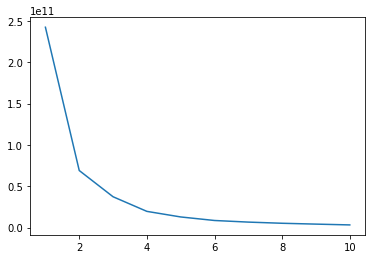

In [ ]:
#k için optimum değer belirleme wcss
sonuclar = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)

plt.plot(range(1,11),sonuclar)


burada k değeri 4-3-2 herhangi biri olabilir. sonra k değerini değiştirerek duruma bakılabilir.

[1 1 1 0 0 0 0 1 0 3 3 1 3 0 1 2 1 0 1 1 0 0 1 3 2 3 0 1 0 3 0 3 3 1 3 3 3
 0 3 2 2 0 1 0 0 3 3 3 3 2 0 1 2 2 1 1 0 1 3 1 2 1 3 0 3 0 3 1 3 0 1 1 1 1
 0 0 2 1 3 0 0 0 3 3 2 1 1 3 0 0 1 0 2 3 0 3 0 1 0 0 3 2 1 0 0 1 1 3 3 2 2
 1 1 1 1 3 0 1 3 3 0 3 1 1 1 3 0 0 2 0 0 3 3 3 3 0 3 3 1 3 1 0 3 3 1 3 3 3
 3 0 3 3 1 0 3 2 0 3 2 0 3 3 0 3 0 3 3 1 0 0 1 0 0 3 1 0 0 3 2 3 3 1 3 2 1
 2 0 0 3 0 3 0 3 1 0 1 1 3 3 3]


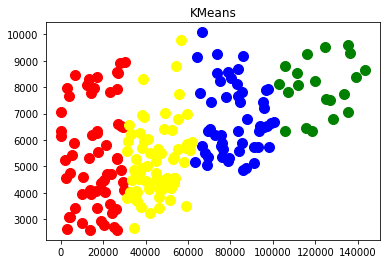

In [ ]:
kmeans = KMeans (n_clusters = 4, init='k-means++', random_state= 123)
Y_tahmin= kmeans.fit_predict(X)
print(Y_tahmin)  
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title('KMeans')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
Y_tahmin = ac.fit_predict(X)
print(Y_tahmin)



[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 3 0 2 0 0 2 2 0 1 3 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 3 0 2 0 2 2 1 1 1 1 3 2 0 3 3 0 0 2 0 1 0 3 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 3 0 1 2 2 2 1 1 3 0 0 1 2 2 0 2 3 1 2 1 2 0 2 2 1 3 0 2 2 0 0 1 1 3 3
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 3 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 3 2 1 3 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 3 1 1 0 1 3 0
 3 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


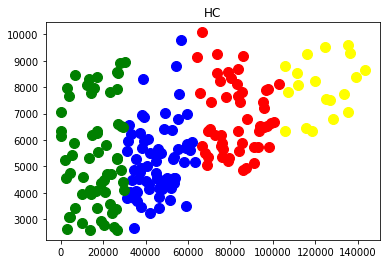

In [ ]:
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title('HC')
plt.show()


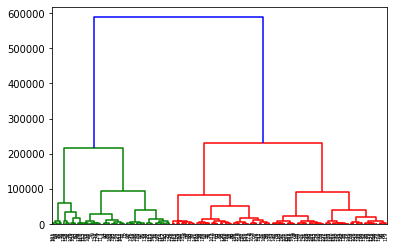

In [ ]:

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()
